# Chest-prediction - MODEL DenseNet - Only on diseases!



## Setup

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
AUTOTUNE = tf.data.AUTOTUNE

## Download and inspect the dataset

### Retrieve the images

Before you start any training, you'll need to download the dataset. I already resized the original dataset of the images to pass from 45GB to 3GB.

In [4]:
import os
from pathlib import Path

project_name = "chest-predictor"
username = os.environ.get('USER')

#Set variables (origin url, destination folder, folder name)
data_url = 'https://storage.googleapis.com/chest-predictor-data/resized_dataset.zip'
data_dir = f"/Users/{username}/code/sachamagier/{project_name}/raw_data"
data_fname = 'resized_dataset.zip'


#Downloading the dataset
data_root_orig = tf.keras.utils.get_file(
    fname=os.path.join(data_dir, data_fname),
    origin=data_url
)

Unzip the dataset download from GCS

** **Uncomment the block below if you need to unzip the file** **

In [ ]:
#import zipfile

##Extract the dataset
#with zipfile.ZipFile(data_root_orig, 'r') as zip_ref:
    #zip_ref.extractall(data_dir)

In [5]:
#Set the new data_root
data_root = Path(os.path.join(data_dir, 'resized_dataset'))
print(data_root)

/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset


In [6]:
#This remove the '__MACOSX' file that is created on Mac Laptops
import shutil

if Path(os.path.join(data_dir, "__MACOSX")).is_dir():
    # remove the __MACOSX folder if it exists
    shutil.rmtree("../raw_data/__MACOSX")

In [7]:
#Get all image paths
all_image_paths = [str(path) for path in (data_root/"images"/"set_full").iterdir()]

In [8]:
image_count = len(all_image_paths)
image_count

111601

** **Uncomment this block below if if it's the first time you download and unzip the dataset and didn't get a len(all_image_paths) of 111601 - it will find all (256,256,4) images and delete them** **

In [9]:
from PIL import Image

## specify your dataset directory
#data_directory = data_root/"images"/"set_full"

## list to store the names of the images to be removed
#images_to_remove = []

## iterate over all files in the dataset directory
#for filename in os.listdir(data_directory):
    #if filename.endswith(".png"):  # make sure it's a png file
        #file_path = os.path.join(data_directory, filename)
        #image = Image.open(file_path)  # load the image with Pillow

        ## convert the image to a numpy array to check its shape
        #image_array = np.array(image)

        ## check the shape of the image
        #if image_array.shape == (256, 256, 4):
            #images_to_remove.append(filename)  # add the filename to the list if it's to be removed

## print the names of the images to be removed
#print("Images to be removed: ", images_to_remove)


Images to be removed:  ['00027784_006.png', '00000497_000.png', '00030323_020.png', '00007188_006.png', '00006993_000.png', '00004438_004.png', '00001280_003.png', '00006214_000.png', '00004281_003.png', '00007041_000.png', '00003215_000.png', '00004770_000.png', '00005496_000.png', '00001882_001.png', '00007174_001.png', '00028661_000.png', '00000122_000.png', '00001305_000.png', '00005722_002.png', '00000218_004.png', '00000579_000.png', '00007471_002.png', '00001055_002.png', '00014486_003.png', '00006763_003.png', '00004784_000.png', '00014419_001.png', '00003976_000.png', '00030798_000.png', '00001252_001.png', '00005813_000.png', '00000918_000.png', '00005394_000.png', '00021131_005.png', '00004072_000.png', '00003821_001.png', '00005568_000.png', '00004877_001.png', '00014426_000.png', '00005123_000.png', '00011963_001.png', '00000955_001.png', '00001532_000.png', '00003923_007.png', '00003923_005.png', '00007048_000.png', '00000210_000.png', '00001558_010.png', '00006109_000.pn

In [10]:
#Path(os.path.join(data_directory, filename))

PosixPath('/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00012908_000.png')

In [ ]:
#for filename in images_to_remove:
    #if os.path.exists(os.path.join(data_directory, filename)):
        #os.remove(os.path.join(data_directory, filename))
        #print(f"{filename} deleted")
    #else:
        #print("The file does not exist")

In [13]:
##remove the images from the list in all image paths
#all_image_paths = [path for path in all_image_paths if path.split("/")[-1] not in images_to_remove]

In [9]:
image_count = len(all_image_paths)
image_count

111601

In [10]:
all_image_paths[:10]

['/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00018805_001.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00005868_002.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00009663_000.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00022156_007.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00005395_004.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00006966_004.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00000324_013.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/set_full/00007442_018.png',
 '/Users/arnodebelle/code/sachamagier/chest-predictor/raw_data/resized_dataset/images/se

### Inspect the images
Now let's have a quick look at a couple of the images, so you know what you're dealing with:

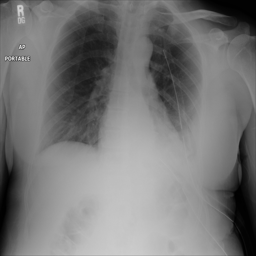

00015284_004.png



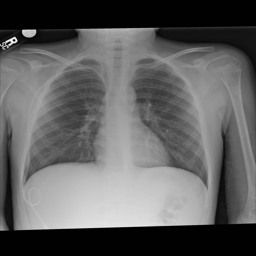

00004605_003.png



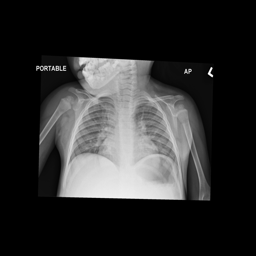

00027639_001.png



In [11]:
import IPython.display as display
import random

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(os.path.basename(image_path))
    print()

### Determine the label for each image

Extracting the labels from the CSV

In [12]:
import pandas as pd
# Load labels
labels_df = pd.read_csv(data_root/"Data_Entry_2017.csv")
labels_df.set_index('Image Index', inplace=True)

In [13]:
labels_df.head(20)

,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
Image Index,,,,,,,,,,,
00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN


In [14]:
# Create list of all image labels
all_image_labels = labels_df.loc[[os.path.basename(path) for path in all_image_paths], 'Finding Labels'].values

In [15]:
all_image_labels[:25]

array(['No Finding', 'No Finding', 'No Finding', 'Pneumonia',
       'No Finding', 'Pneumonia', 'No Finding', 'No Finding',
       'No Finding', 'No Finding', 'No Finding',
       'Atelectasis|Infiltration', 'Fibrosis', 'Infiltration',
       'No Finding', 'No Finding', 'No Finding', 'No Finding',
       'No Finding', 'Atelectasis', 'Cardiomegaly', 'Infiltration',
       'Consolidation', 'No Finding', 'No Finding'], dtype=object)

In [16]:
len(all_image_labels)

111601

In [17]:
# Create a boolean mask for the elements that are not 'No Finding'
mask = all_image_labels != 'No Finding'

# Use the boolean mask to index the original array and get a new array without the 'No Finding' elements
new_image_labels = all_image_labels[mask]
new_image_labels

array(['Pneumonia', 'Pneumonia', 'Atelectasis|Infiltration', ...,
       'Infiltration|Pneumothorax', 'Infiltration', 'Infiltration'],
      dtype=object)

#### Encoding the labels

Encoding the labels using *StringLookup*

In [18]:
#len of no finding
len([label for label in all_image_labels if label == 'No Finding'])

60016

In [19]:
no_finding_images = [os.path.basename(path) for path in all_image_paths if labels_df.loc[os.path.basename(path), 'Finding Labels'] == 'No Finding']

no_finding_images

['00018805_001.png',
 '00005868_002.png',
 '00009663_000.png',
 '00005395_004.png',
 '00000324_013.png',
 '00007442_018.png',
 '00003923_012.png',
 '00028483_007.png',
 '00024175_003.png',
 '00026987_001.png',
 '00025374_001.png',
 '00025380_000.png',
 '00002143_003.png',
 '00029676_004.png',
 '00015530_077.png',
 '00008745_019.png',
 '00027618_013.png',
 '00006590_000.png',
 '00007765_003.png',
 '00007791_002.png',
 '00010920_006.png',
 '00018168_000.png',
 '00030753_001.png',
 '00028613_000.png',
 '00025110_007.png',
 '00013648_003.png',
 '00016765_001.png',
 '00016791_000.png',
 '00007903_000.png',
 '00019860_005.png',
 '00011945_002.png',
 '00027514_001.png',
 '00014868_000.png',
 '00009805_003.png',
 '00006700_007.png',
 '00015160_005.png',
 '00019462_000.png',
 '00029319_000.png',
 '00010447_020.png',
 '00029666_010.png',
 '00016490_025.png',
 '00005910_002.png',
 '00021120_001.png',
 '00018989_000.png',
 '00015288_002.png',
 '00008211_000.png',
 '00015981_005.png',
 '00013956_00

In [20]:
all_image_paths = [path for path in all_image_paths if os.path.basename(path) not in no_finding_images]

len(all_image_paths)

51585

In [21]:
#Creating a list of the 14 different labels
label_names = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

In [22]:
string_lookup = tf.keras.layers.StringLookup(vocabulary=label_names, num_oov_indices=0)

In [23]:
# Vectorized encoding of labels
def encode_labels(labels):
    split_labels = tf.strings.split(labels, '|')
    encoded_labels = string_lookup(split_labels)
    one_hot_encoded = tf.reduce_sum(tf.one_hot(encoded_labels, depth=len(label_names)), axis=0)
    return one_hot_encoded

In [32]:
## Apply encoding to all labels in a vectorized manner
#encoded_values = tf.stack([encode_labels(labels) for labels in new_image_labels])

In [33]:
#labels_np = encoded_values.numpy()

In [34]:
#labels_np[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
      dtype=float32)

In [35]:
#labels_df = pd.DataFrame(labels_np) #convert to a dataframe
#labels_df.to_csv("../raw_data/only_disease_encoded_labels.csv",index=False) #save to file

In [33]:
df_labels = pd.read_csv("../raw_data/only_disease_encoded_labels.csv")

In [34]:
new_encoded_values = tf.convert_to_tensor(df_labels.values, dtype=tf.float32)

In [35]:
encoded_values = new_encoded_values

In [36]:
encoded_values_np = encoded_values.numpy()

In [37]:
print("Encoded values:")
print(encoded_values_np[:10])

Encoded values:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [38]:
#Checking the lenght
len(encoded_values_np)

51585

In [39]:
vocab = string_lookup.get_vocabulary()

# Display the vocabulary and their corresponding indices
for i, label in enumerate(vocab):
    print(f"Index {i}: {label}")

Index 0: Atelectasis
Index 1: Consolidation
Index 2: Infiltration
Index 3: Pneumothorax
Index 4: Edema
Index 5: Emphysema
Index 6: Fibrosis
Index 7: Effusion
Index 8: Pneumonia
Index 9: Pleural_Thickening
Index 10: Cardiomegaly
Index 11: Nodule
Index 12: Mass
Index 13: Hernia


In [40]:
# Convert encoded values to tensor slices for the dataset
label_ds = tf.data.Dataset.from_tensor_slices(encoded_values)

In [32]:
label_ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(14,), dtype=tf.float32, name=None)>

In [41]:
def preprocess_image(image):
    # convert it to rgb => VGG16 takes RGB image only
    image = tf.image.grayscale_to_rgb(image)

    # Resize the image to a width and a height of 256 pixels
    image = tf.image.resize(image, [224, 224], method='nearest')
    # Normalize the pixel values of the image to the range of [0, 1] => WE DON'T NEED FOR VGG16 (but we finally use another one...)
    image /= 255

    return image

In [42]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    # Decode the image contents
    img_tensor = tf.image.decode_png(image)[:,:,0:1]
    # return img_tensor
    return preprocess_image(img_tensor)

In [43]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [44]:
path_ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [45]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [46]:
path_label_ds = tf.data.Dataset.from_tensor_slices((all_image_paths, encoded_values))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = path_label_ds.map(load_and_preprocess_from_path_label)
image_label_ds

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(14,), dtype=tf.float32, name=None))>

In [47]:
train_size = int(0.6 * len(all_image_paths))
val_size = int(0.2 * len(all_image_paths))
test_size = int(0.2 * len(all_image_paths))

In [48]:
train_ds = image_label_ds.take(train_size)

In [49]:
val_ds = image_label_ds.skip(train_size).take(val_size)

In [50]:
test_ds = image_label_ds.skip(train_size + val_size).take(test_size)

In [51]:
BATCH_SIZE = 32

def creating_batch_dataset(dataset, BATCH_SIZE, AUTOTUNE):
    ds = dataset.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

In [52]:
ds = creating_batch_dataset(image_label_ds, BATCH_SIZE, AUTOTUNE)
train_ds = creating_batch_dataset(train_ds, BATCH_SIZE, AUTOTUNE)
val_ds = creating_batch_dataset(val_ds, BATCH_SIZE, AUTOTUNE)
test_ds = creating_batch_dataset(test_ds, BATCH_SIZE, AUTOTUNE)

In [54]:
# rearrange to -1 to 1
#def change_range(image,label):
  #return 2*image-1, label

#keras_ds = ds.map(change_range)

In [55]:
#full_ds = ds.map(change_range)
#train_converted_ds = train_ds.map(change_range)
#val_converted_ds = val_ds.map(change_range)
#test_converted_ds = test_ds.map(change_range)

In [53]:
AUC = tf.keras.metrics.AUC(multi_label=True)

In [59]:
densenet121 = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    classes=1000,
)
densenet121.trainable=False

29084464/29084464 [==============================] - 4s 0us/step


In [60]:
densenet121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [61]:
model = tf.keras.Sequential([
  densenet121,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names), activation = 'sigmoid')])

In [62]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.legacy.Adam(),
              loss='binary_crossentropy',
              metrics=["accuracy", AUC])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 14)                14350     
                                                                 
Total params: 7051854 (26.90 MB)
Trainable params: 14350 (56.05 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [64]:
STEPS_PER_EPOCH=tf.math.ceil(train_size/BATCH_SIZE).numpy() #alternative = len(all_image_paths)
STEPS_PER_EPOCH

968.0

In [65]:
STEPS_PER_EPOCH_VAL=tf.math.ceil(val_size/BATCH_SIZE).numpy() #alternative = len(all_image_paths)
STEPS_PER_EPOCH_VAL

323.0

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_auc', #'val_multilabel_f1_score',  # the name of the metric will be its prefix + '_' + its function name
                   mode='max',
                   patience=3,
                   verbose=1,
                   restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath= os.path.join(data_dir, 'best_only_disease_model.keras'),
                                   save_best_only=True,
                                   monitor='val_auc')

In [67]:
EPOCHS = 50

history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=EPOCHS, 
                    steps_per_epoch=STEPS_PER_EPOCH, 
                    validation_steps=STEPS_PER_EPOCH_VAL,
                    callbacks=[es, model_checkpoint])

Epoch 1/50
968/968 [==============================] - 1084s 1s/step - loss: 0.2994 - accuracy: 0.3038 - auc: 0.6087 - val_loss: 0.2869 - val_accuracy: 0.3088 - val_auc: 0.6723
Epoch 2/50
968/968 [==============================] - 1139s 1s/step - loss: 0.2858 - accuracy: 0.3251 - auc: 0.6796 - val_loss: 0.2841 - val_accuracy: 0.3124 - val_auc: 0.6917
Epoch 3/50
968/968 [==============================] - 1136s 1s/step - loss: 0.2821 - accuracy: 0.3331 - auc: 0.7005 - val_loss: 0.2833 - val_accuracy: 0.3141 - val_auc: 0.6966
Epoch 4/50
472/968 [=============>................] - ETA: 7:15 - loss: 0.2804 - accuracy: 0.3379 - auc: 0.7101

KeyboardInterrupt: 

In [70]:
from tensorflow.keras.models import save_model

models_dir = '../models'

# Ensure that the models directory exists
os.makedirs(data_dir, exist_ok=True)


# Save the trained model to the models directory
save_model(model, os.path.join(data_dir, 'ADE_final_only_disease_model.keras'))

In [71]:
STEPS_PER_EPOCH_TEST=tf.math.ceil(test_size/BATCH_SIZE).numpy() #alternative = len(all_image_paths)
STEPS_PER_EPOCH_TEST

323.0

In [72]:
results = model.evaluate(test_ds, steps=STEPS_PER_EPOCH_TEST, verbose=0)
print(f"Test AUC: {results[2]}")

Test AUC: 0.6927852630615234


In [73]:
results

[0.29043471813201904, 0.3114357590675354, 0.6927852630615234]